# **Introduction to Computer Vision. Lab 08.  Convolutional Neural Networks I**

## **Theory:**

**Convolutional Neural Networks (CNNs):**
- CNNs are a class of deep neural networks specifically designed for processing structured grid data like images. They utilize convolutional layers, which apply a convolution operation to the input, passing the result to the next layer. This allows the network to capture spatial hierarchies in the data.

**Components of CNN:**
1. **Convolutional Layer:** Applies a set of learnable filters to the input. Each filter slides over the input spatially, performing a dot product between the filter and portions of the input.
2. **ReLU Activation Function:** Applies the ReLU (Rectified Linear Unit) activation function to introduce non-linearity into the model, enabling it to learn more complex patterns.
3. **Pooling Layer:** Reduces the spatial dimensions of the input, typically using max pooling, which selects the maximum value in each patch of each feature map. This reduces the computational cost and helps in creating invariant features.
4. **Fully Connected Layer:** Flattens the input and feeds it into a fully connected layer, which is the same as a regular neural network layer.

**Mini-Batch Gradient Descent:**
- Mini-batch gradient descent is an optimization algorithm that splits the training dataset into small batches and performs an update for each batch. This combines the benefits of both batch gradient descent (stable convergence) and stochastic gradient descent (fast convergence).

**Benefits of Mini-Batch Gradient Descent:**
- More stable updates compared to stochastic gradient descent.
- Faster convergence than batch gradient descent.
- Efficient use of memory.



## **Excercise 1: Create functions that implement forward and back propagation through the convolutional node shown below**

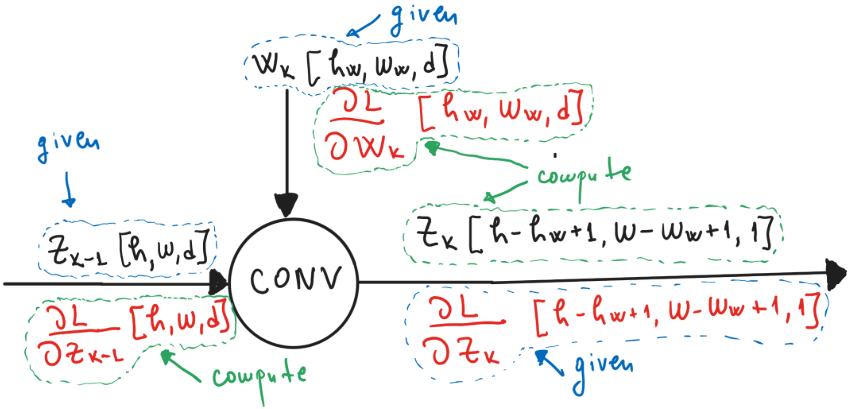

### Convolutional Node Forward Propagation

In [ ]:
import numpy as np

def conv_forward(X, W, stride=1, padding=0):
    (n_H_prev, n_W_prev, n_C_prev) = X.shape
    (f, f, n_C_prev, n_C) = W.shape

    n_H = int((n_H_prev - f + 2 * padding) / stride) + 1
    n_W = int((n_W_prev - f + 2 * padding) / stride) + 1

    Z = np.zeros((n_H, n_W, n_C))

    X_pad = np.pad(X, ((padding, padding), (padding, padding), (0, 0)), 'constant', constant_values = (0,0))

    for h in range(n_H):
        for w in range(n_W):
            for c in range(n_C):
                vert_start = h * stride
                vert_end = vert_start + f
                horiz_start = w * stride
                horiz_end = horiz_start + f

                X_slice = X_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                Z[h, w, c] = np.sum(X_slice * W[:, :, :, c])

    return Z

### Convolutional Node Backward Propagation

In [ ]:
def conv_backward(dZ, X, W, stride=1, padding=0):
    (n_H_prev, n_W_prev, n_C_prev) = X.shape
    (f, f, n_C_prev, n_C) = W.shape

    n_H = dZ.shape[0]
    n_W = dZ.shape[1]

    dX = np.zeros(X.shape)
    dW = np.zeros(W.shape)

    X_pad = np.pad(X, ((padding, padding), (padding, padding), (0, 0)), 'constant', constant_values = (0,0))
    dX_pad = np.pad(dX, ((padding, padding), (padding, padding), (0, 0)), 'constant', constant_values = (0,0))

    for h in range(n_H):
        for w in range(n_W):
            for c in range(n_C):
                vert_start = h * stride
                vert_end = vert_start + f
                horiz_start = w * stride
                horiz_end = horiz_start + f

                X_slice = X_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                dX_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:, :, :, c] * dZ[h, w, c]
                dW[:, :, :, c] += X_slice * dZ[h, w, c]

    if padding != 0:
        dX = dX_pad[padding:-padding, padding:-padding, :]
    else:
        dX = dX_pad

    return dX, dW

## **Theory:**

**Using TensorFlow/Keras for Convolutional Neural Network**

This part of the exercise demonstrates the flexibility and power of using high-level deep learning libraries like TensorFlow/Keras for building and training convolutional neural networks. These libraries provide a user-friendly API for implementing complex models with minimal code, leveraging optimized backend operations.

**Benefits of High-Level Libraries:**

**Ease of Use:** Simplified syntax and modular components make it easy to build and experiment with different neural network architectures.

**Optimized Performance:** Efficient computation through optimized backend engines (e.g., TensorFlow, Theano).

**Predefined Layers and Functions:** Access to a wide range of pre-built layers, loss functions, and optimizers, reducing the need to implement these from scratch.

**Community Support and Documentation:** Extensive resources and community support to assist with model development and troubleshooting.



## **Excercise 2: Using any library/package you wish, find and propose built-in functions that perform the same functions as those you created in 1). To show this, you need to show that for given inputs, these built-in functions produce the same outputs as the functions you created in 1)**

### Using TensorFlow/Keras for Convolution Operations

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

# Define a function using TensorFlow/Keras
def conv2d_tf(X, W):
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    W = tf.convert_to_tensor(W, dtype=tf.float32)
    X = tf.expand_dims(X, axis=0)
    W = tf.transpose(W, [2, 3, 0, 1])
    conv_layer = Conv2D(filters=W.shape[-1], kernel_size=W.shape[0], strides=(1, 1), padding='valid', use_bias=False)
    conv_layer.build(X.shape)
    conv_layer.set_weights([W])
    Z = conv_layer(X)
    return tf.squeeze(Z).numpy()

# Example usage
X = np.random.randn(5, 5, 3)
W = np.random.randn(3, 3, 3, 2)

Z_custom = conv_forward(X, W)
Z_tf = conv2d_tf(X, W)

print('Custom Convolution Output:')
print(Z_custom)

print('TensorFlow Convolution Output:')
print(Z_tf)

# Check if the outputs are close
print('Difference:', np.linalg.norm(Z_custom - Z_tf))

# **Conclusion**
* Implementing CNNs using mini-batch gradient descent leverages the strengths of both CNNs and this optimization technique, allowing for efficient training and effective learning of spatial hierarchies in image data. This combination is widely used in image classification tasks due to its robustness and performance.

* Utilizing high-level libraries like TensorFlow/Keras can significantly streamline the process of developing and training neural networks. This approach allows for rapid prototyping and experimentation, enabling researchers and practitioners to focus on model architecture and hyperparameter tuning rather than low-level implementation details.